In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, LabelEncoder

<h1 style = 'color:Orange'>Decision Tree</h1>

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3429
           1       0.95      0.97      0.96      1070

    accuracy                           0.98      4499
   macro avg       0.97      0.98      0.97      4499
weighted avg       0.98      0.98      0.98      4499

22


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

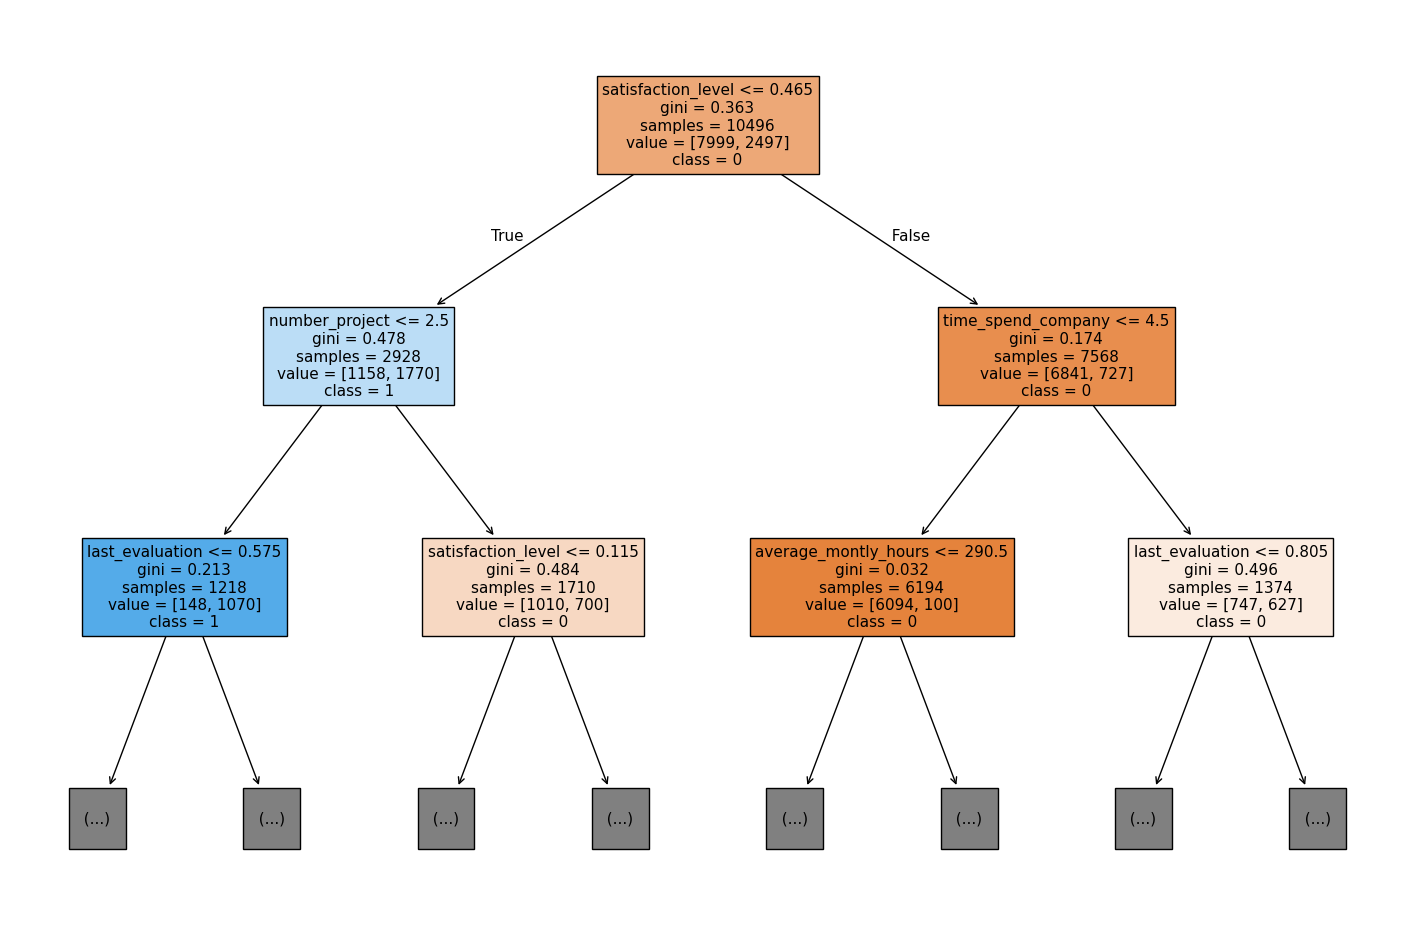

In [2]:
ohe = OneHotEncoder(sparse_output=False,drop='first',).set_output(transform='pandas')
oe = OrdinalEncoder(categories=[['low','medium','high']]).set_output(transform='pandas')

hr = pd.read_csv('../Cases/HRAnalytics/HR_comma_sep.csv')

column_transform = make_column_transformer((ohe,['Department']),(oe,['salary']),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

X = hr.drop('left',axis = 1)
y = hr['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

X_train_ct = column_transform.fit_transform(X_train)
X_test_ct =column_transform.transform(X_test)

dtc = DecisionTreeClassifier(criterion='gini',random_state = 25)
dtc.fit(X_train_ct,y_train)
plt.figure(figsize=(18,12))
plot_tree(dtc,feature_names = list(X_test_ct.columns),class_names=['0','1'],filled=True,fontsize=11,max_depth=2);
y_pred = dtc.predict(X_test_ct)
print(classification_report(y_test,y_pred))

hr_tst = pd.read_csv('../Cases/HRAnalytics/tst_hr.csv')
print(dtc.tree_.max_depth)
hr_tst_ct = column_transform.transform(hr_tst)
dtc.predict(hr_tst_ct)




<h1 style = color:orange>Wisconsin dataset</h1>

              precision    recall  f1-score   support

      Benign       0.92      0.96      0.94       138
   Malignant       0.92      0.83      0.88        72

    accuracy                           0.92       210
   macro avg       0.92      0.90      0.91       210
weighted avg       0.92      0.92      0.92       210



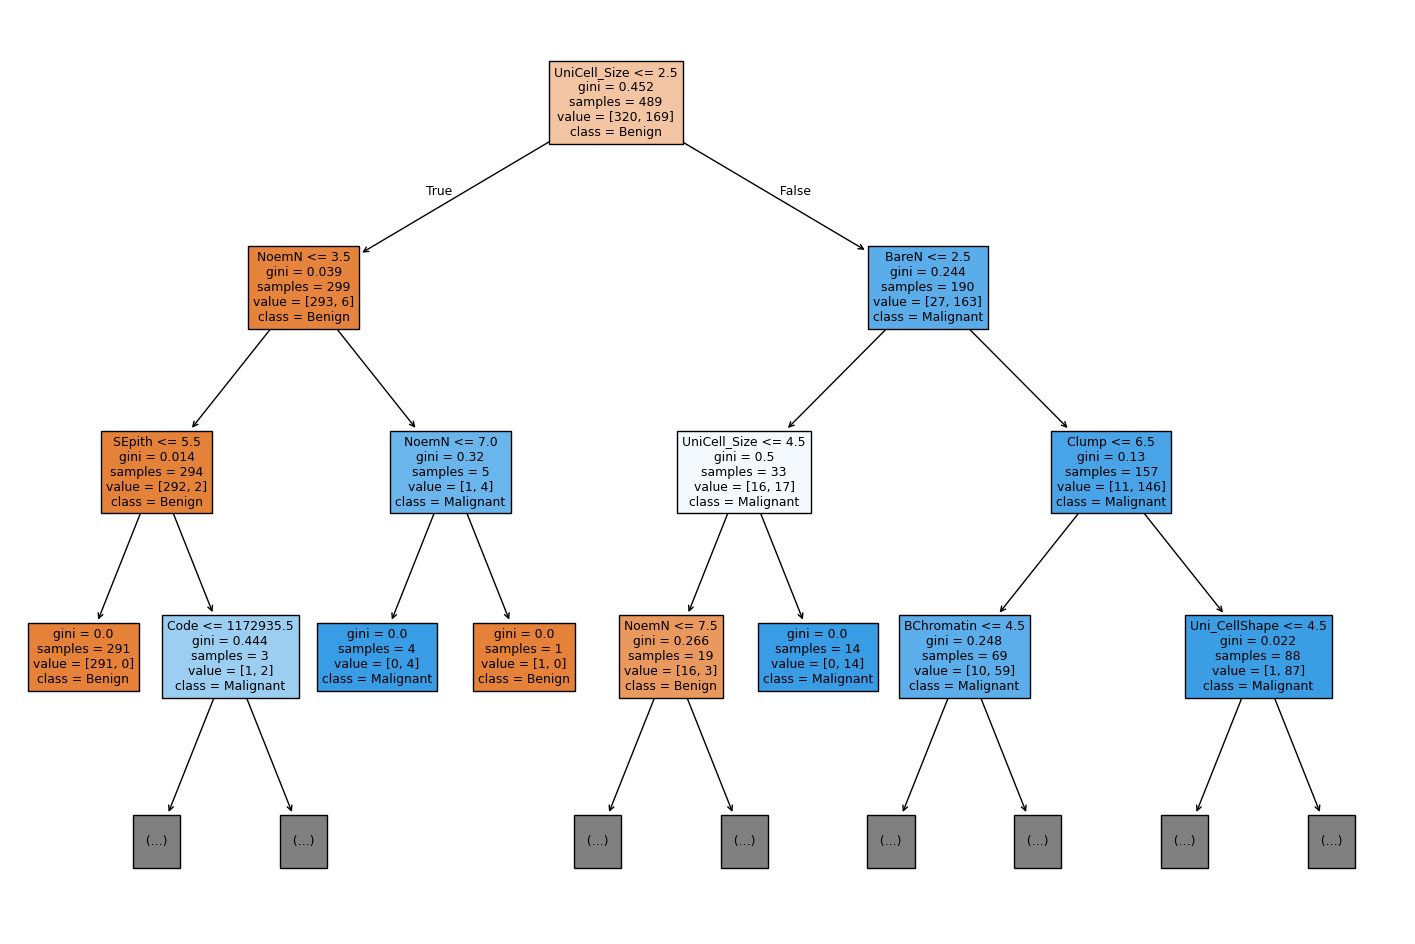

In [3]:
wisconsin = pd.read_csv('../Cases/Wisconsin/BreastCancer.csv')


X = wisconsin.drop('Class',axis = 1)
y = wisconsin['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

dtc = DecisionTreeClassifier(random_state = 25)

plt.figure(figsize=(18,12))
dtc.fit(X_train,y_train)
plot_tree(dtc,max_depth=3,filled=True,class_names=['Benign','Malignant'],feature_names=list(X_train.columns));
y_pred = dtc.predict(X_test)
print(classification_report(y_test,y_pred))

<h1 style = color:orange>Min Sample Split / Min Sample Leaf </h1>

In [4]:
hr = pd.read_csv('../Cases/HRAnalytics/HR_comma_sep.csv')

column_transform = make_column_transformer((ohe, make_column_selector(dtype_include=object)),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

X = hr.drop('left',axis = 1)
y = hr['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

X_train_ct = column_transform.fit_transform(X_train)
X_test_ct =column_transform.transform(X_test)

depths = [3, 4, 5, 6, 7, 10, 11, None]
leaves = [1, 50, 75, 100, 150]
splits = [2, 50, 75, 100, 150]

scores = []

for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeClassifier(random_state=25, max_depth=d, min_samples_split=s, min_samples_leaf=l)
            dtc.fit(X_train_ct, y_train)
            y_pred = dtc.predict(X_test_ct)
            scores.append([d, l, s, f1_score(y_test, y_pred, pos_label=1)])

scores = pd.DataFrame(scores, columns=['depth', 'leaf', 'split', 'score'])
scores = scores.sort_values('score', ascending=False)
scores

,depth,leaf,split,score
125,10.0,1,2,0.962013
175,NaN,1,2,0.961290
126,10.0,1,50,0.960539
127,10.0,1,75,0.960539
152,11.0,1,75,0.960539
...,...,...,...,...
23,3.0,150,100,0.888268
24,3.0,150,150,0.888268
22,3.0,150,75,0.888268
21,3.0,150,50,0.888268


In [5]:
best_dtc = DecisionTreeClassifier(random_state=25, max_depth=9, min_samples_leaf=1, min_samples_split=2)

X_trns = column_transform.fit_transform(X)
best_dtc.fit(X_trns, y)

imp_features = pd.DataFrame({'feature': list(X_trns.columns), 'imp': best_dtc.feature_importances_})
imp_features = imp_features.sort_values('imp', ascending=False)
imp_features

,feature,imp
11,satisfaction_level,0.519846
15,time_spend_company,0.148528
12,last_evaluation,0.143526
13,number_project,0.108963
14,average_montly_hours,0.074325
9,salary_low,0.002113
10,salary_medium,0.000770
8,Department_technical,0.000612
7,Department_support,0.000431
0,Department_RandD,0.000373


In [17]:
glass = pd.read_csv('../Cases/Glass_Identification/Glass.csv')

X = glass.drop('Type', axis=1)
y = glass['Type']

encoder = LabelEncoder()

y = encoder.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

# y_train_enc = encoder.fit_transform(y_train)
# y_test_enc = encoder.transform(y_test)


depths = [None,3, 2, 4, 5]
splits = [2, 5, 10, 20]
leaves = [1, 5, 10, 10]

scores = []

for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeClassifier(random_state=25, max_depth=d, min_samples_split=s, min_samples_leaf=l)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict_proba(X_test)
            scores.append([d, l, s, log_loss(y_test, y_pred)])

scores = pd.DataFrame(scores, columns=['depth', 'leaf', 'split', 'log_loss'])
scores = scores.sort_values('log_loss')
scores

# best_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10,min_samples_split= 2,random_state =25)
# best_model.fit(X,y)
# imp_features = pd.DataFrame({'features' : X.columns,'importance' : best_model.feature_importances_})
# imp_features.sort_values('importance',ascending=False)

,depth,leaf,split,log_loss
24,3.0,10,2,1.983123
25,3.0,10,5,1.983123
26,3.0,10,10,1.983123
27,3.0,10,20,1.983123
28,3.0,10,2,1.983123
...,...,...,...,...
4,NaN,5,2,5.919950
5,NaN,5,5,5.919950
6,NaN,5,10,5.919950
1,NaN,1,5,8.488387


In [19]:
glasses = pd.read_csv('../Cases/Glass_Identification/Glass.csv')

X = glasses.drop('Type',axis = 1)
y = glasses['Type']

le = LabelEncoder()